# 타 국가의 은행 파산이 국내 금융지주사에 미치는 영향

공변량 후보: 미국, 한국(환율, 경제 성장률, GDP, 금리, 주식지수)

환율 USD, KRW, USD/KRW  V

주식 지수: KOSPI, KRX100, DJI 

무역 거래량? 외교지수?

## 데이터 준비

In [1]:
import FinanceDataReader as fdr
import pandas as pd
from pandas.tseries.offsets import CustomBusinessDay
import numpy as np
from datetime import datetime, timedelta
from causalimpact import CausalImpact
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_o=pd.read_csv('C:/Users/Edward/Desktop/PythonWorkspace/인허가/df_o_new.csv')
df_c=pd.read_csv('C:/Users/Edward/Desktop/PythonWorkspace/인허가/df_c_new.csv')

In [3]:
# KS11 (KOSPI 지수), 2022년~현재
df = fdr.DataReader('KS11', '2021')
df = pd.DataFrame(df)
x = pd.DataFrame(df['Close'])
x

,Close
Date,
2021-01-04,2944.449951
2021-01-05,2990.570068
2021-01-06,2968.209961
2021-01-07,3031.679932
2021-01-08,3152.179932
...,...
2023-09-13,2534.699951
2023-09-14,2572.889893
2023-09-15,2601.280029


In [4]:
df1 = fdr.DataReader('105560', '2021') #KB
df1 = pd.DataFrame(df1)
df1

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2021-01-04,43150,43150,42150,42450,2825436,-0.021889
2021-01-05,42600,43750,41900,43550,3108053,0.025913
2021-01-06,43850,44700,43350,44000,3637798,0.010333
2021-01-07,45550,46300,45300,46000,4683821,0.045455
2021-01-08,46800,46800,45550,46500,3696066,0.010870
...,...,...,...,...,...,...
2023-09-13,54900,56000,54800,55500,903843,0.012774
2023-09-14,55800,56100,55500,56100,1039824,0.010811
2023-09-15,56200,58000,56100,57300,2254377,0.021390


In [5]:
df2 = fdr.DataReader('316140', '2021') #우리
df2 = pd.DataFrame(df2)
df2

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2021-01-04,9600,9700,9510,9510,2227495,-0.022610
2021-01-05,9530,9630,9410,9610,2318934,0.010515
2021-01-06,9590,9730,9450,9580,3594459,-0.003122
2021-01-07,9800,9920,9720,9840,4155453,0.027140
2021-01-08,9900,9920,9730,9910,3068580,0.007114
...,...,...,...,...,...,...
2023-09-13,12050,12250,12040,12250,2990709,0.016598
2023-09-14,12260,12300,12180,12270,2795090,0.001633
2023-09-15,12280,12590,12260,12590,4631152,0.026080


In [6]:
df3 = fdr.DataReader('086790', '2021') #하나
df3 = pd.DataFrame(df3)
df3

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2021-01-04,34000,34050,33250,33450,2312196,-0.030435
2021-01-05,33250,34100,32750,34050,2441785,0.017937
2021-01-06,34150,35300,33900,34750,3379422,0.020558
2021-01-07,36000,36800,35650,36800,4379391,0.058993
2021-01-08,37100,37900,36450,37700,3631187,0.024457
...,...,...,...,...,...,...
2023-09-13,40450,41550,40350,41300,1074258,0.015990
2023-09-14,41300,41650,40950,41650,1117498,0.008475
2023-09-15,41750,43500,41400,43500,2558842,0.044418


In [7]:
df4 = fdr.DataReader('055550', '2021') #신한
df4 = pd.DataFrame(df4)
df4

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2021-01-04,32050,32050,31500,31550,2983516,-0.015601
2021-01-05,31500,32250,31200,32100,3411233,0.017433
2021-01-06,32200,32800,31950,32400,4751214,0.009346
2021-01-07,33500,33900,33300,33750,6546753,0.041667
2021-01-08,34200,34250,33250,33650,4748235,-0.002963
...,...,...,...,...,...,...
2023-09-13,35900,36750,35900,36750,1148345,0.020833
2023-09-14,37100,37100,36450,36650,1083316,-0.002721
2023-09-15,36950,38200,36700,38000,2449194,0.036835


In [8]:
df5 = fdr.DataReader('139130', '2021') #DGB
df5 = pd.DataFrame(df5)
df5

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2021-01-04,6800,6850,6610,6660,1034781,-0.019146
2021-01-05,6650,6790,6620,6780,956497,0.018018
2021-01-06,6770,6840,6700,6800,948272,0.002950
2021-01-07,6960,7250,6880,7200,1870252,0.058824
2021-01-08,7230,7320,6890,7230,1103273,0.004167
...,...,...,...,...,...,...
2023-09-13,7670,7780,7650,7740,405204,0.000000
2023-09-14,7760,8000,7750,8000,1020986,0.033592
2023-09-15,7990,8130,7960,8040,900765,0.005000


In [9]:
df6 = fdr.DataReader('138930', '2021') #BNK
df6 = pd.DataFrame(df6)
df6

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2021-01-04,5650,5660,5510,5560,2067437,-0.021127
2021-01-05,5510,5590,5480,5580,2758276,0.003597
2021-01-06,5590,5670,5520,5570,6467687,-0.001792
2021-01-07,5720,5790,5670,5780,3856777,0.037702
2021-01-08,5830,5840,5710,5780,3213667,0.000000
...,...,...,...,...,...,...
2023-09-13,6870,6980,6870,6960,639735,0.007236
2023-09-14,6960,7050,6940,7050,1040313,0.012931
2023-09-15,7080,7250,7060,7140,1786297,0.012766


In [10]:
df7 = fdr.DataReader('175330', '2021') #JB
df7 = pd.DataFrame(df7)
df7

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2021-01-04,5640,5650,5440,5480,712462,-0.028369
2021-01-05,5540,5590,5450,5590,538026,0.020073
2021-01-06,5610,5630,5490,5520,605600,-0.012522
2021-01-07,5650,5720,5610,5680,973122,0.028986
2021-01-08,5750,5760,5670,5710,633366,0.005282
...,...,...,...,...,...,...
2023-09-13,10150,10190,9930,10100,613943,-0.012708
2023-09-14,10120,10300,10050,10300,468400,0.019802
2023-09-15,10310,10470,10300,10390,585431,0.008738


In [11]:
start_date = "2021-01-04"
end_date = "2023-06-30"

In [12]:
dfs = []  # DataFrame들을 저장할 리스트

for i in range(1, 5):
    df = eval('df{}'.format(i))  # 직접 DataFrame에 접근
    dfs.append(df['Close'])  # 'Close' 열을 리스트에 추가

# DataFrame들을 병합
merged_df = dfs[0]  # 첫 번째 DataFrame으로 시작
for i in range(1, len(dfs)):
    merged_df = pd.merge(merged_df, dfs[i], on='Date', how='inner')

# 병합된 DataFrame 출력
merged_df

,Close_x,Close_y,Close_x,Close_y
Date,,,,
2021-01-04,42450,9510,33450,31550
2021-01-05,43550,9610,34050,32100
2021-01-06,44000,9580,34750,32400
2021-01-07,46000,9840,36800,33750
2021-01-08,46500,9910,37700,33650
...,...,...,...,...
2023-09-13,55500,12250,41300,36750
2023-09-14,56100,12270,41650,36650
2023-09-15,57300,12590,43500,38000


In [13]:
# 열 이름에 숫자를 붙여 변경
new_columns = [f'Close_{i+1}' for i in range(len(merged_df.columns))]
merged_df.columns = new_columns

# 변경된 열 이름 확인
print(merged_df.columns)
merged_df = pd.DataFrame(merged_df)

Index(['Close_1', 'Close_2', 'Close_3', 'Close_4'], dtype='object')


In [14]:
merged_df.to_csv('merged_df1.csv')

In [15]:
x.reset_index(inplace=True)
x['Date'] = pd.to_datetime(x['Date'])
x.set_index('Date')
x

,Date,Close
0,2021-01-04,2944.449951
1,2021-01-05,2990.570068
2,2021-01-06,2968.209961
3,2021-01-07,3031.679932
4,2021-01-08,3152.179932
...,...,...
666,2023-09-13,2534.699951
667,2023-09-14,2572.889893
668,2023-09-15,2601.280029
669,2023-09-18,2574.719971


In [16]:
merged_df.reset_index(inplace=True)
merged_df['Date'] = pd.to_datetime(merged_df['Date'])
merged_df.set_index('Date')
merged_df = merged_df[(merged_df["Date"] >= start_date) & (merged_df["Date"] <= end_date)]
merged_df

,Date,Close_1,Close_2,Close_3,Close_4
0,2021-01-04,42450,9510,33450,31550
1,2021-01-05,43550,9610,34050,32100
2,2021-01-06,44000,9580,34750,32400
3,2021-01-07,46000,9840,36800,33750
4,2021-01-08,46500,9910,37700,33650
...,...,...,...,...,...
612,2023-06-26,47200,11960,39650,34650
613,2023-06-27,47550,11960,39850,34650
614,2023-06-28,48150,11980,40250,34700
615,2023-06-29,47100,11610,38800,33850


In [17]:
# 주중, 주말 및 공휴일 설정
weekmask = 'Mon Tue Wed Thu Fri'
weekend = ['Sat', 'Sun']  # 주말 설정
today = datetime.now()
tomorrow = today + timedelta(1)
holidays = pd.to_datetime(['2021-01-01', '2023-06-30'])  # 공휴일 날짜 설정
today = today.strftime('%Y-%m-%d')

# CustomBusinessDay 객체 생성
custom_business_day = CustomBusinessDay(weekmask=weekmask, holidays=holidays, calendar=weekend)

# 주말과 공휴일을 포함한 모든 비즈니스 데이 날짜 생성
business_dates = pd.date_range(start=merged_df['Date'].min(), end=merged_df['Date'].max(), freq=custom_business_day)

# 주말과 공휴일을 포함한 모든 날짜로 데이터프레임 재생성
merged_df.set_index('Date', inplace=True)  # 인덱스 재설정
merged_df = merged_df.reindex(business_dates)

x.set_index('Date', inplace=True)
x = x.reindex(business_dates)

# 결측치를 이전 유효한 값으로 채우기
merged_df = merged_df.fillna(method='ffill')

x = x.fillna(method='bfill')

# 변경된 데이터프레임 출력
merged_df

,Close_1,Close_2,Close_3,Close_4
2021-01-04,42450.0,9510.0,33450.0,31550.0
2021-01-05,43550.0,9610.0,34050.0,32100.0
2021-01-06,44000.0,9580.0,34750.0,32400.0
2021-01-07,46000.0,9840.0,36800.0,33750.0
2021-01-08,46500.0,9910.0,37700.0,33650.0
...,...,...,...,...
2023-06-23,46950.0,11930.0,39950.0,34400.0
2023-06-26,47200.0,11960.0,39650.0,34650.0
2023-06-27,47550.0,11960.0,39850.0,34650.0
2023-06-28,48150.0,11980.0,40250.0,34700.0


In [18]:
x

,Close
2021-01-04,2944.449951
2021-01-05,2990.570068
2021-01-06,2968.209961
2021-01-07,3031.679932
2021-01-08,3152.179932
...,...
2023-06-23,2570.100098
2023-06-26,2582.199951
2023-06-27,2581.389893
2023-06-28,2564.189941


In [19]:
merged_df.columns = ['KB', '우리', '하나', '신한']
merged_df

,KB,우리,하나,신한
2021-01-04,42450.0,9510.0,33450.0,31550.0
2021-01-05,43550.0,9610.0,34050.0,32100.0
2021-01-06,44000.0,9580.0,34750.0,32400.0
2021-01-07,46000.0,9840.0,36800.0,33750.0
2021-01-08,46500.0,9910.0,37700.0,33650.0
...,...,...,...,...
2023-06-23,46950.0,11930.0,39950.0,34400.0
2023-06-26,47200.0,11960.0,39650.0,34650.0
2023-06-27,47550.0,11960.0,39850.0,34650.0
2023-06-28,48150.0,11980.0,40250.0,34700.0


In [20]:
merged_df.to_csv('merged_df.csv')

In [21]:
# SVB 파산
pre_period = ['2021-01-04', '2023-03-09']
post_period = ['2023-03-10', "2023-06-29"]

### 데이터 합치기

In [22]:
df_c

,폐업일자,담배소매업,목욕장업,숙박업,석유판매업,일반음식점,집단급식소,이용업,휴게음식점,즉석판매제조가공업,...,환경관리대행기관,요트장업,승강기제조및수입업체,일반야영장업,골프장,동물장묘업,동물미용업,동물위탁관리업,동물운송업,동물전시업
0,1900-01-01,5,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1961-07-11,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1967-07-10,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1967-09-28,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1969-09-04,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13835,2023-08-14,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13836,2023-08-20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13837,2023-08-29,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13838,2023-08-31,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
# 시작 날짜와 끝나는 날짜 지정
start_date = "2021-01-04"
end_date = "2023-06-29"

# 시계열 생성
df_c['폐업일자'] = pd.to_datetime(df_c['폐업일자'])
df_c = df_c[(df_c["폐업일자"] >= start_date) & (df_c["폐업일자"] <= end_date)]

# 주말과 공휴일을 포함한 모든 날짜로 데이터프레임 재생성
df_c.set_index('폐업일자', inplace=True)  # 인덱스 재설정
df_c = df_c.reindex(business_dates)

# 결측치를 이전 유효한 값으로 채우기
df_c = df_c.fillna(0)

# 변경된 데이터프레임 출력
df_c

,담배소매업,목욕장업,숙박업,석유판매업,일반음식점,집단급식소,이용업,휴게음식점,즉석판매제조가공업,약국,...,환경관리대행기관,요트장업,승강기제조및수입업체,일반야영장업,골프장,동물장묘업,동물미용업,동물위탁관리업,동물운송업,동물전시업
2021-01-04,49,0,6,3,176,11,4,90,60,8,...,0,0,0,0,0,0,4,2,1,1
2021-01-05,69,2,2,2,188,13,5,94,100,1,...,0,0,0,0,0,0,2,0,0,0
2021-01-06,39,3,5,1,141,8,4,62,144,3,...,0,0,0,0,0,0,2,2,0,0
2021-01-07,41,1,0,0,92,8,2,52,173,2,...,0,0,0,0,0,0,1,1,0,0
2021-01-08,41,0,2,1,122,8,1,56,43,3,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-23,38,2,3,2,212,7,3,95,87,3,...,0,0,0,0,0,0,0,0,0,0
2023-06-26,61,1,2,0,264,3,9,188,81,2,...,0,0,0,0,0,0,2,0,0,0
2023-06-27,64,4,2,0,294,4,3,72,113,4,...,0,0,0,0,0,0,4,2,2,0
2023-06-28,57,1,5,1,229,6,5,101,301,3,...,0,0,0,0,0,0,0,1,1,0


In [24]:
dfc = pd.DataFrame(df_c['일반음식점'])
dfc = dfc.astype(int)
dfc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 649 entries, 2021-01-04 to 2023-06-29
Freq: C
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   일반음식점   649 non-null    int32
dtypes: int32(1)
memory usage: 7.6 KB


## 결과

In [25]:
for index, row in merged_df.iteritems():
    try:
        if row.sum() > 2:
            ci = pd.DataFrame(row).join(x, how='inner')
            ci = ci.join(dfc, how = 'left')
        cib = CausalImpact(ci, pre_period, post_period, model_args={'fit_method': 'hmc'}, nseason=[{'period': 12}])
        summary = cib.summary_data.to_dict()
        print(index + "," + str(round(summary['average'].get('abs_effect'),2)) + '%,' + str(round((summary['average'].get('rel_effect')*100),2)) + '%,' + str(round(cib.p_value,2)))
        ci
    except ValueError as e:
        print(e)

KB,-5039.36%,-9.43%,0.0
우리,-838.25%,-6.71%,0.0
하나,-4658.54%,-10.14%,0.0
신한,-4130.81%,-10.54%,0.0


In [37]:
ci

,신한,Close,일반음식점
2021-01-04,31550.0,2944.449951,176
2021-01-05,32100.0,2990.570068,188
2021-01-06,32400.0,2968.209961,141
2021-01-07,33750.0,3031.679932,92
2021-01-08,33650.0,3152.179932,122
...,...,...,...
2023-06-23,34400.0,2570.100098,212
2023-06-26,34650.0,2582.199951,264
2023-06-27,34650.0,2581.389893,294
2023-06-28,34700.0,2564.189941,229


KB
Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    48378.12           3870250.0
Prediction (s.d.)         53417.49 (611.62)  4273399.11 (48929.38)
95% CI                    [52280.56, 54678.06][4182444.94, 4374244.58]

Absolute effect (s.d.)    -5039.36 (611.62)  -403149.11 (48929.38)
95% CI                    [-6299.93, -3902.44][-503994.58, -312194.94]

Relative effect (s.d.)    -9.43% (1.14%)     -9.43% (1.14%)
95% CI                    [-11.79%, -7.31%]  [-11.79%, -7.31%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


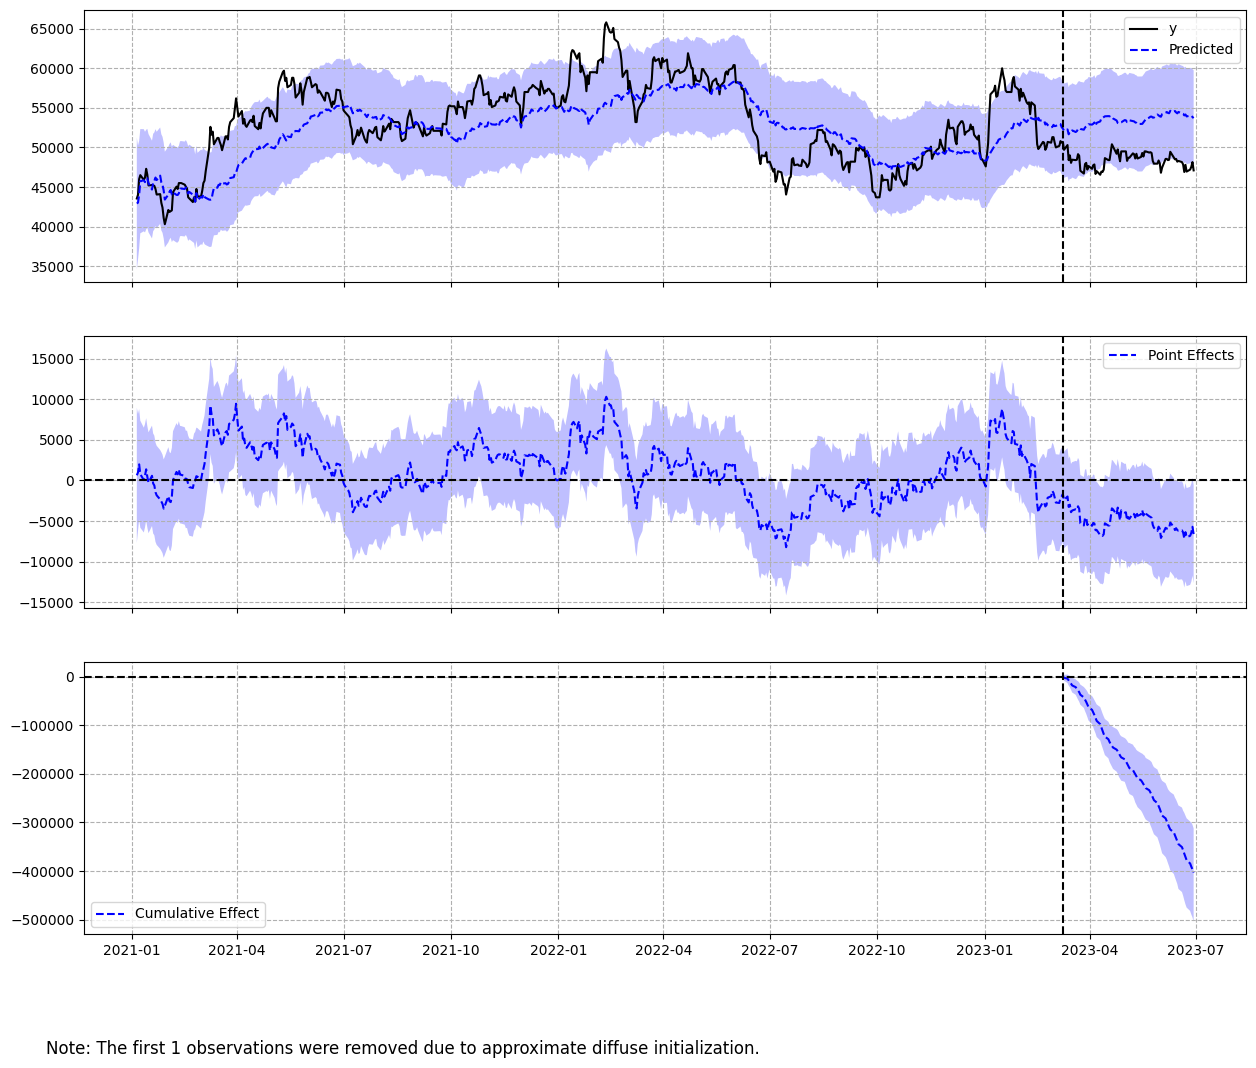

____________________________________________________________________________________________________
우리
Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    11651.5            932120.0
Prediction (s.d.)         12489.75 (149.32)  999180.09 (11945.59)
95% CI                    [12213.49, 12798.81][977078.87, 1023904.73]

Absolute effect (s.d.)    -838.25 (149.32)   -67060.09 (11945.59)
95% CI                    [-1147.31, -561.99][-91784.73, -44958.87]

Relative effect (s.d.)    -6.71% (1.2%)      -6.71% (1.2%)
95% CI                    [-9.19%, -4.5%]    [-9.19%, -4.5%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


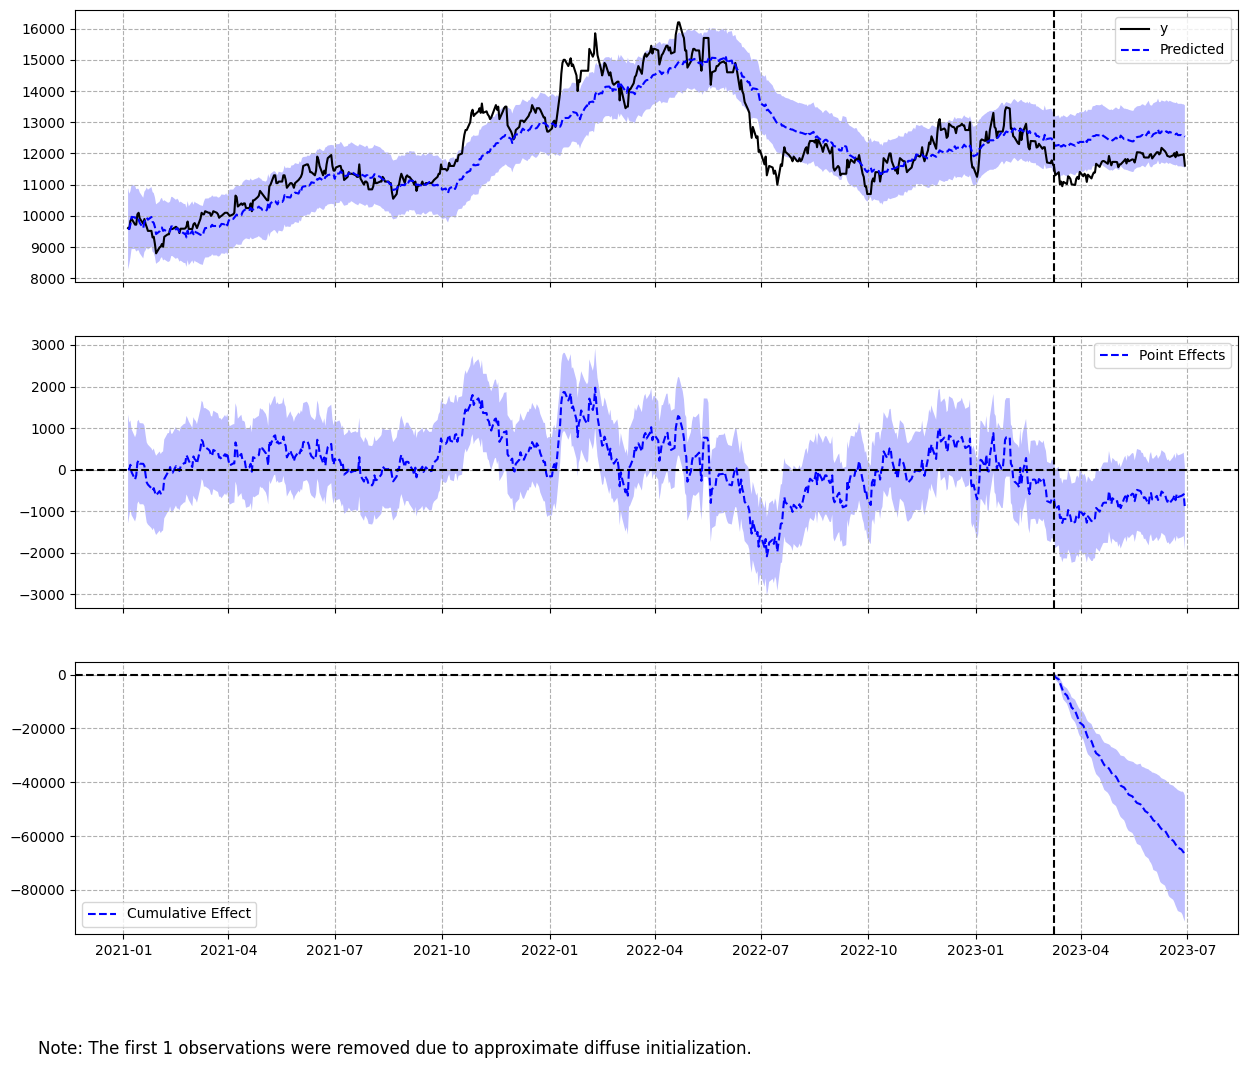

____________________________________________________________________________________________________
하나
Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    41290.62           3303250.0
Prediction (s.d.)         45949.17 (506.26)  3675933.42 (40500.71)
95% CI                    [44964.56, 46949.06][3597164.73, 3755924.61]

Absolute effect (s.d.)    -4658.54 (506.26)  -372683.42 (40500.71)
95% CI                    [-5658.43, -3673.93][-452674.61, -293914.73]

Relative effect (s.d.)    -10.14% (1.1%)     -10.14% (1.1%)
95% CI                    [-12.31%, -8.0%]   [-12.31%, -8.0%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


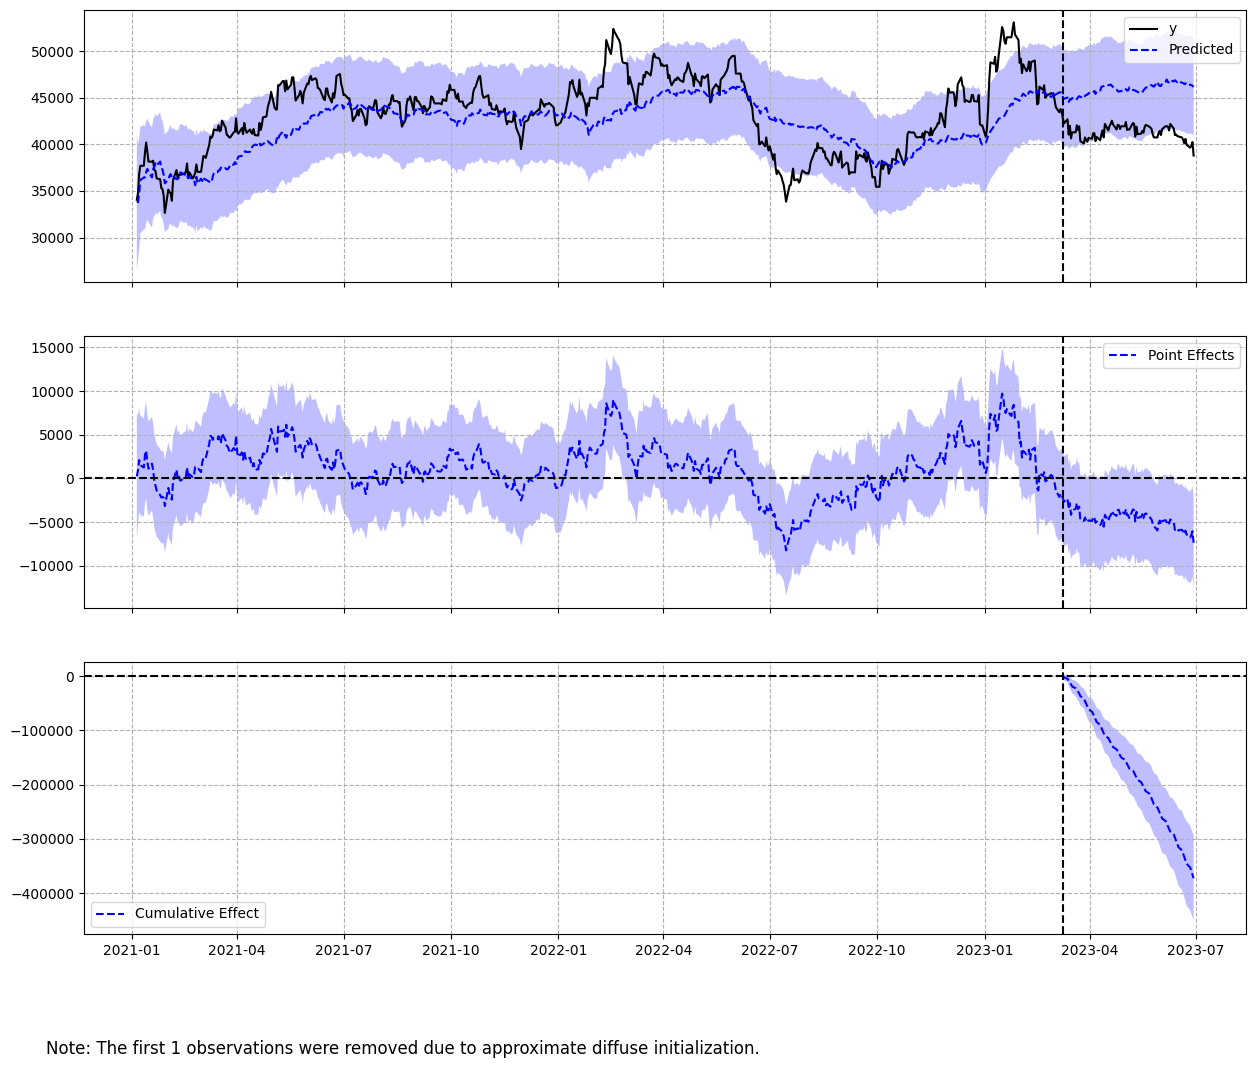

____________________________________________________________________________________________________
신한
Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    35054.38           2804350.0
Prediction (s.d.)         39185.19 (367.57)  3134815.08 (29405.57)
95% CI                    [38463.4, 39904.25][3077072.12, 3192339.83]

Absolute effect (s.d.)    -4130.81 (367.57)  -330465.08 (29405.57)
95% CI                    [-4849.87, -3409.03][-387989.83, -272722.12]

Relative effect (s.d.)    -10.54% (0.94%)    -10.54% (0.94%)
95% CI                    [-12.38%, -8.7%]   [-12.38%, -8.7%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


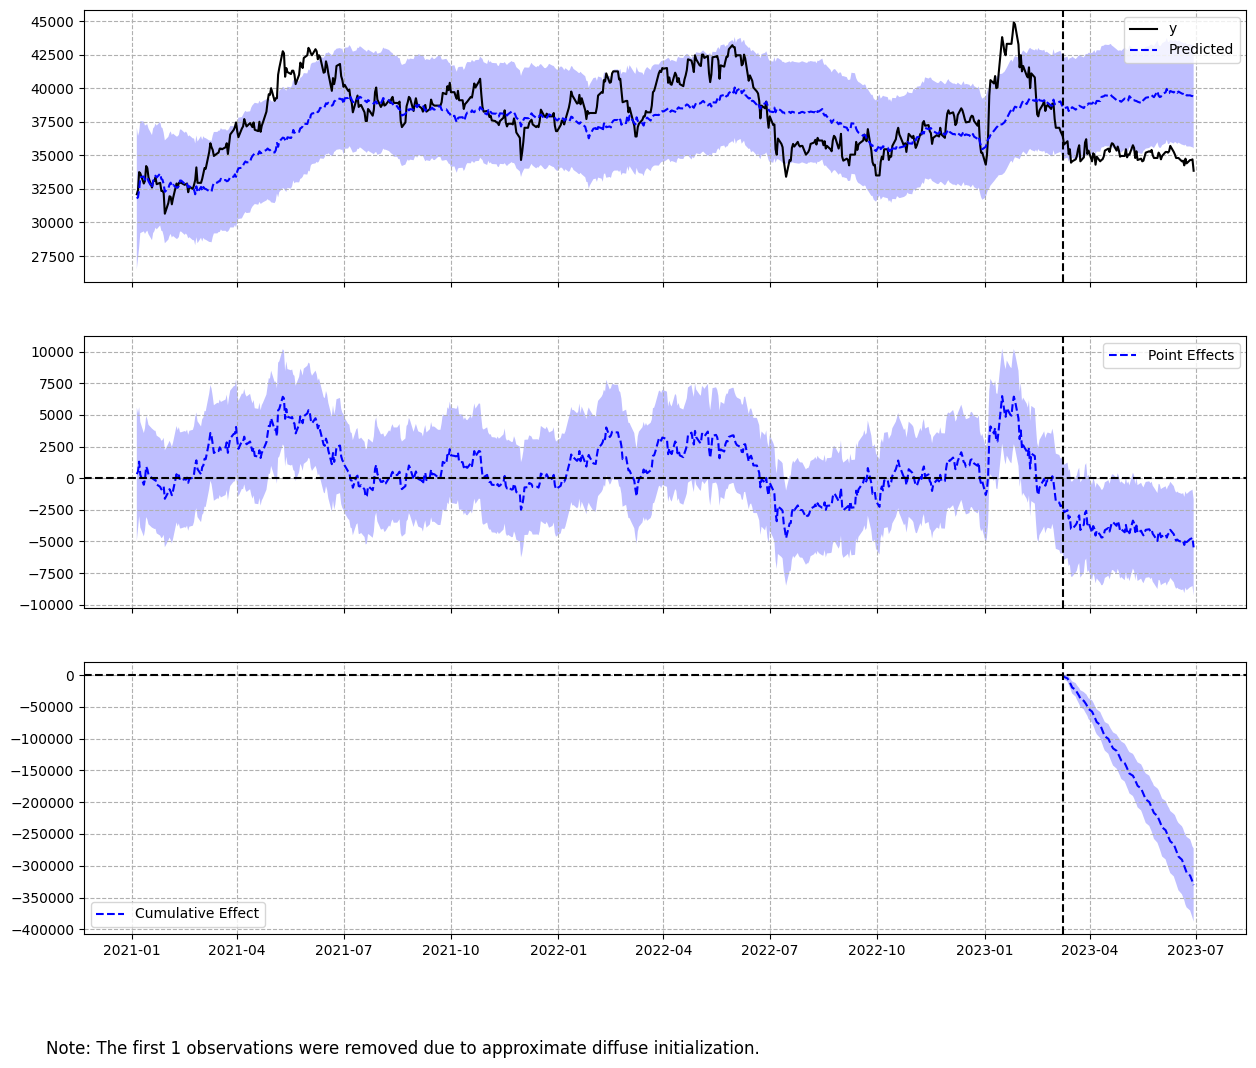

____________________________________________________________________________________________________


In [26]:
for index, row in merged_df.iteritems():
    try:
        if row.sum() > 2:
            ci = pd.DataFrame(row).join(x, how='left')
            ci = ci.join(dfc, how = 'left')
        ci_c = CausalImpact(ci, pre_period, post_period, model_args={'fit_method': 'hmc'}, nseason=[{'period': 12}])
        print(index)
        print(ci_c.summary())
        ci_c.plot()
        print('____________________________________________________________________________________________________')
    except ValueError as e:
        print(e)

In [27]:
# 거리두기 해제
pre_period = ['2021-01-04', '2022-04-18']
post_period = ['2022-04-19', '2022-07-01']

In [28]:
for index, row in merged_df.iteritems():
    try:
        if row.sum() > 2:
            ci = pd.DataFrame(row).join(x, how='left')
            ci = ci.join(dfc, how = 'left')
        cib = CausalImpact(ci, pre_period, post_period, model_args={'fit_method': 'hmc'}, nseason=[{'period': 12}])
        summary = cib.summary_data.to_dict()
        print(index + "," + str(round(summary['average'].get('abs_effect'),2)) + '%,' + str(round((summary['average'].get('rel_effect')*100),2)) + '%,' + str(round(cib.p_value,2)))
    except ValueError as e:
        print(e)

KB,-3254.49%,-5.45%,0.0
우리,-548.49%,-3.63%,0.0
하나,-1152.43%,-2.46%,0.01
신한,2821.72%,7.35%,0.0


KB
Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    56475.93           3049700.0
Prediction (s.d.)         59730.42 (629.13)  3225442.51 (33972.86)
95% CI                    [58498.51, 60964.64][3158919.31, 3292090.46]

Absolute effect (s.d.)    -3254.49 (629.13)  -175742.51 (33972.86)
95% CI                    [-4488.71, -2022.58][-242390.46, -109219.31]

Relative effect (s.d.)    -5.45% (1.05%)     -5.45% (1.05%)
95% CI                    [-7.51%, -3.39%]   [-7.51%, -3.39%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


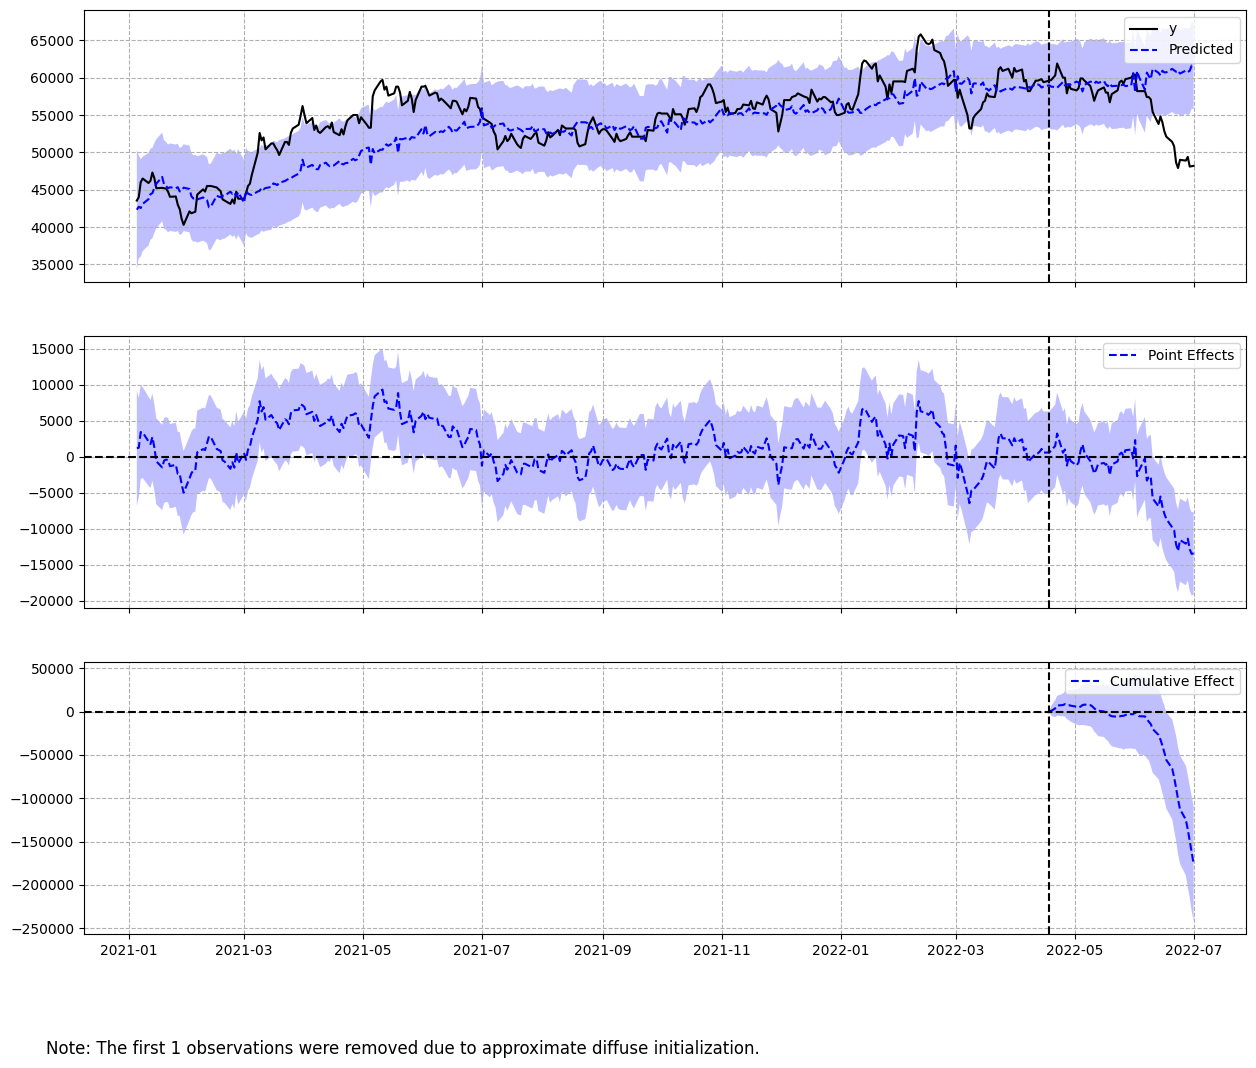

____________________________________________________________________________________________________
우리
Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    14546.3            785500.0
Prediction (s.d.)         15094.79 (141.35)  815118.56 (7632.67)
95% CI                    [14806.7, 15360.76][799561.53, 829481.03]

Absolute effect (s.d.)    -548.49 (141.35)   -29618.56 (7632.67)
95% CI                    [-814.46, -260.4]  [-43981.03, -14061.53]

Relative effect (s.d.)    -3.63% (0.94%)     -3.63% (0.94%)
95% CI                    [-5.4%, -1.73%]    [-5.4%, -1.73%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


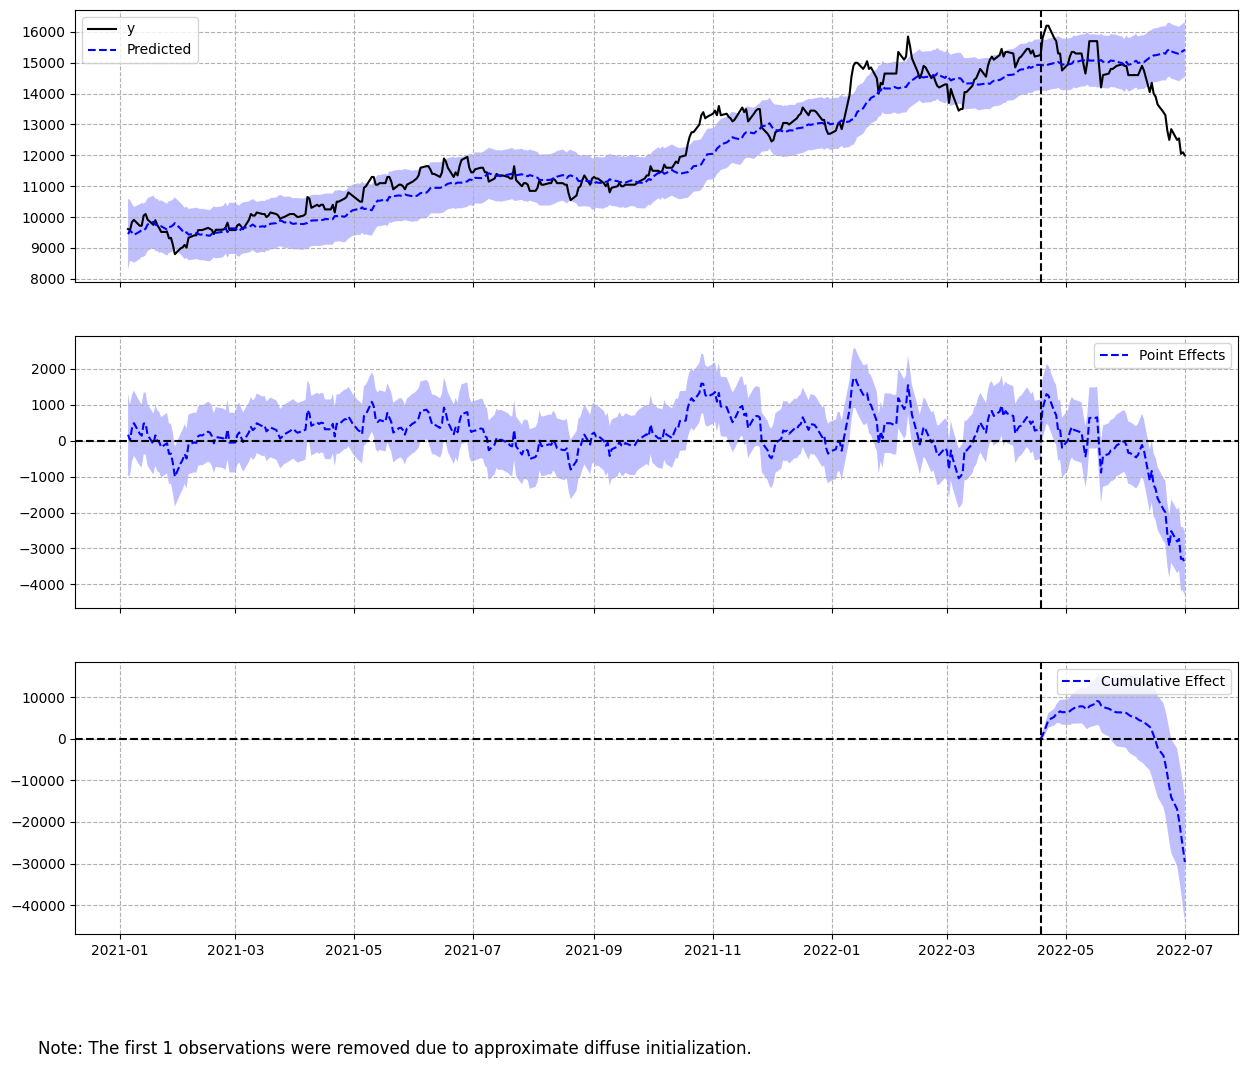

____________________________________________________________________________________________________
하나
Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    45633.33           2464200.0
Prediction (s.d.)         46785.76 (446.25)  2526431.09 (24097.48)
95% CI                    [45939.0, 47688.27][2480706.27, 2575166.65]

Absolute effect (s.d.)    -1152.43 (446.25)  -62231.09 (24097.48)
95% CI                    [-2054.94, -305.67][-110966.65, -16506.27]

Relative effect (s.d.)    -2.46% (0.95%)     -2.46% (0.95%)
95% CI                    [-4.39%, -0.65%]   [-4.39%, -0.65%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 99.6%

For more details run the command: print(impact.summary('report'))


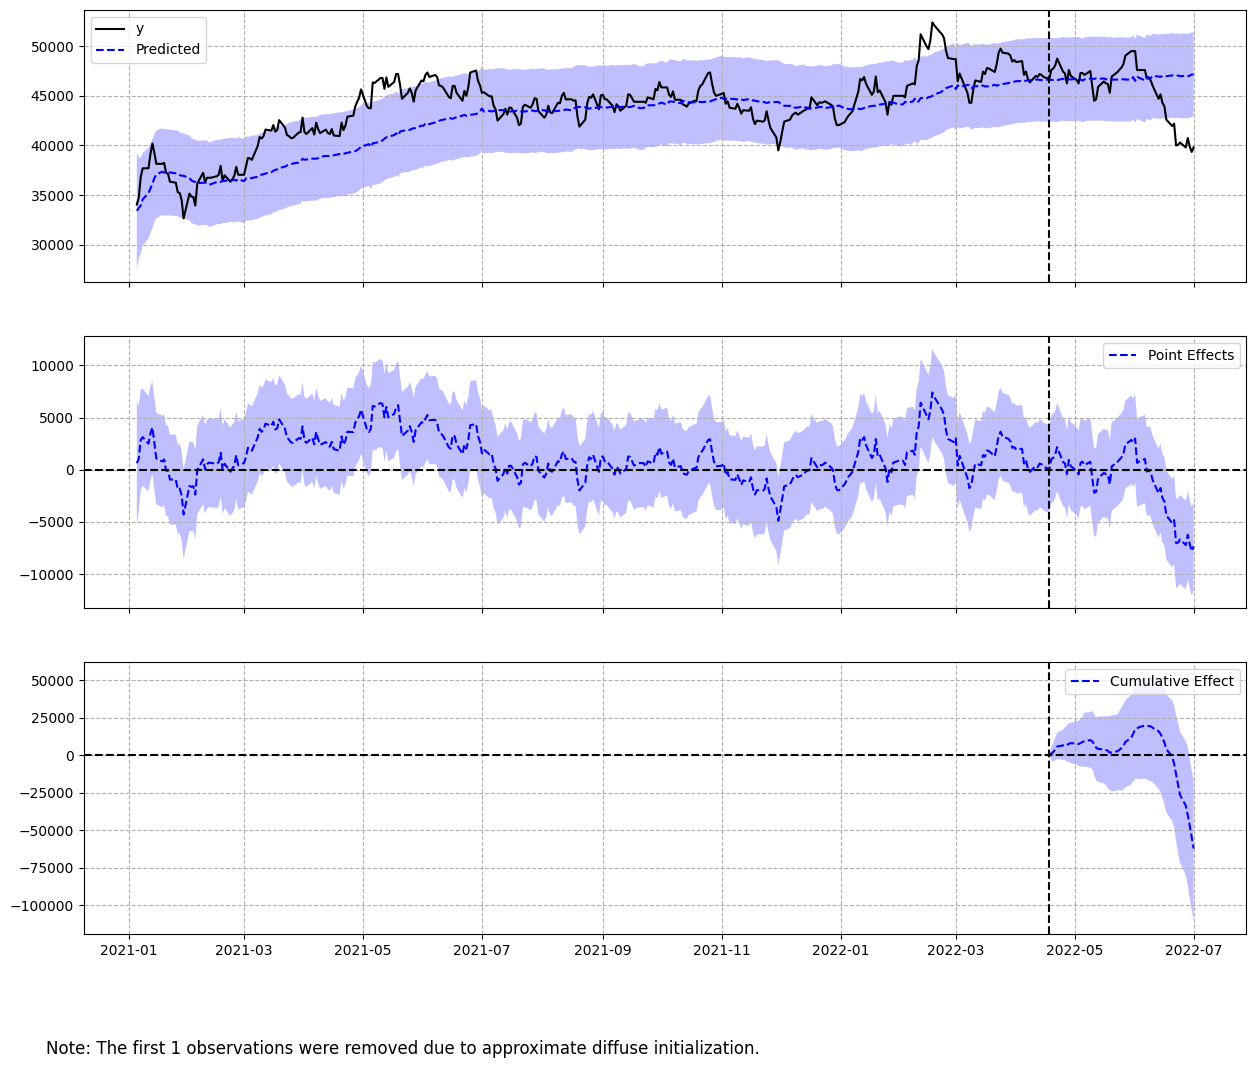

____________________________________________________________________________________________________
신한
Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    41215.74           2225650.0
Prediction (s.d.)         38394.02 (352.73)  2073277.33 (19047.35)
95% CI                    [37688.81, 39071.48][2035195.51, 2109859.76]

Absolute effect (s.d.)    2821.72 (352.73)   152372.67 (19047.35)
95% CI                    [2144.26, 3526.93] [115790.24, 190454.49]

Relative effect (s.d.)    7.35% (0.92%)      7.35% (0.92%)
95% CI                    [5.58%, 9.19%]     [5.58%, 9.19%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


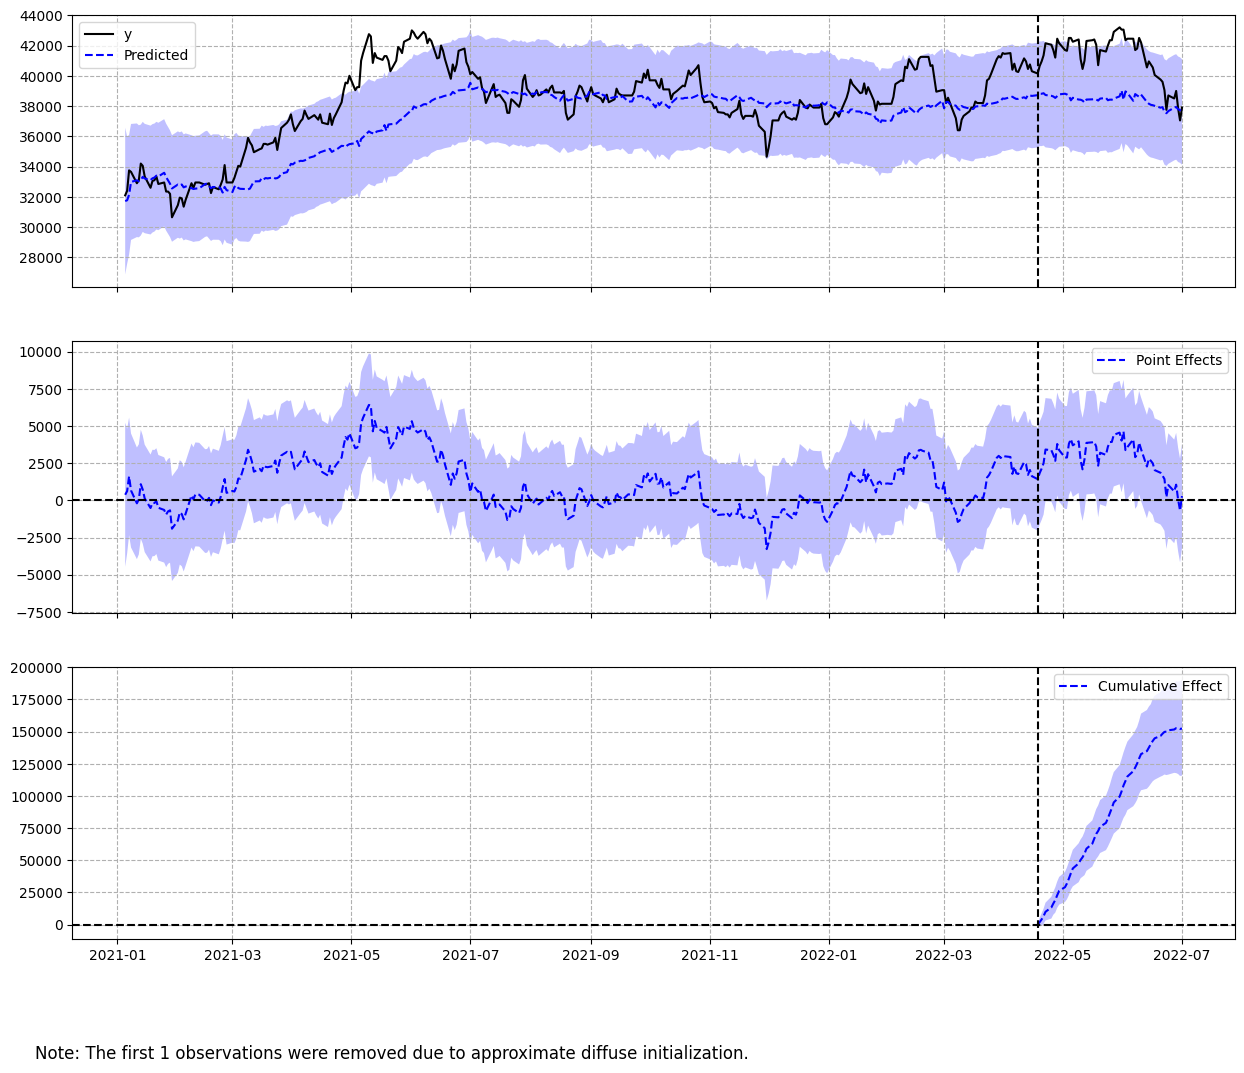

____________________________________________________________________________________________________


In [29]:
for index, row in merged_df.iteritems():
    try:
        if row.sum() > 2:
            ci = pd.DataFrame(row).join(x, how='left')
            ci = ci.join(dfc, how = 'left')
        ci_c = CausalImpact(ci, pre_period, post_period, model_args={'fit_method': 'hmc'}, nseason=[{'period': 12}])
        print(index)
        print(ci_c.summary())
        ci_c.plot()
        print('____________________________________________________________________________________________________')
    except ValueError as e:
        print(e)

In [34]:
# 미 연준 빅스텝
pre_period = ['2021-01-04', '2022-07-27']
post_period = ['2022-07-28', '2022-10-28']

In [35]:
for index, row in merged_df.iteritems():
    try:
        if row.sum() > 2:
            ci = pd.DataFrame(row).join(x, how='left')
            ci = ci.join(dfc, how = 'left')
        cib = CausalImpact(ci, pre_period, post_period, model_args={'fit_method': 'hmc'}, nseason=[{'period': 12}])
        summary = cib.summary_data.to_dict()
        print(index + "," + str(round(summary['average'].get('abs_effect'),2)) + '%,' + str(round((summary['average'].get('rel_effect')*100),2)) + '%,' + str(round(cib.p_value,2)))
    except ValueError as e:
        print(e)

KB,-4336.56%,-8.28%,0.0
우리,-817.75%,-6.52%,0.0
하나,-3469.49%,-8.33%,0.0
신한,-2547.97%,-6.69%,0.0


KB
Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    48052.99           3219550.0
Prediction (s.d.)         52389.54 (692.97)  3510099.49 (46429.25)
95% CI                    [50981.67, 53698.08][3415771.8, 3597771.11]

Absolute effect (s.d.)    -4336.56 (692.97)  -290549.49 (46429.25)
95% CI                    [-5645.09, -2928.68][-378221.11, -196221.8]

Relative effect (s.d.)    -8.28% (1.32%)     -8.28% (1.32%)
95% CI                    [-10.78%, -5.59%]  [-10.78%, -5.59%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


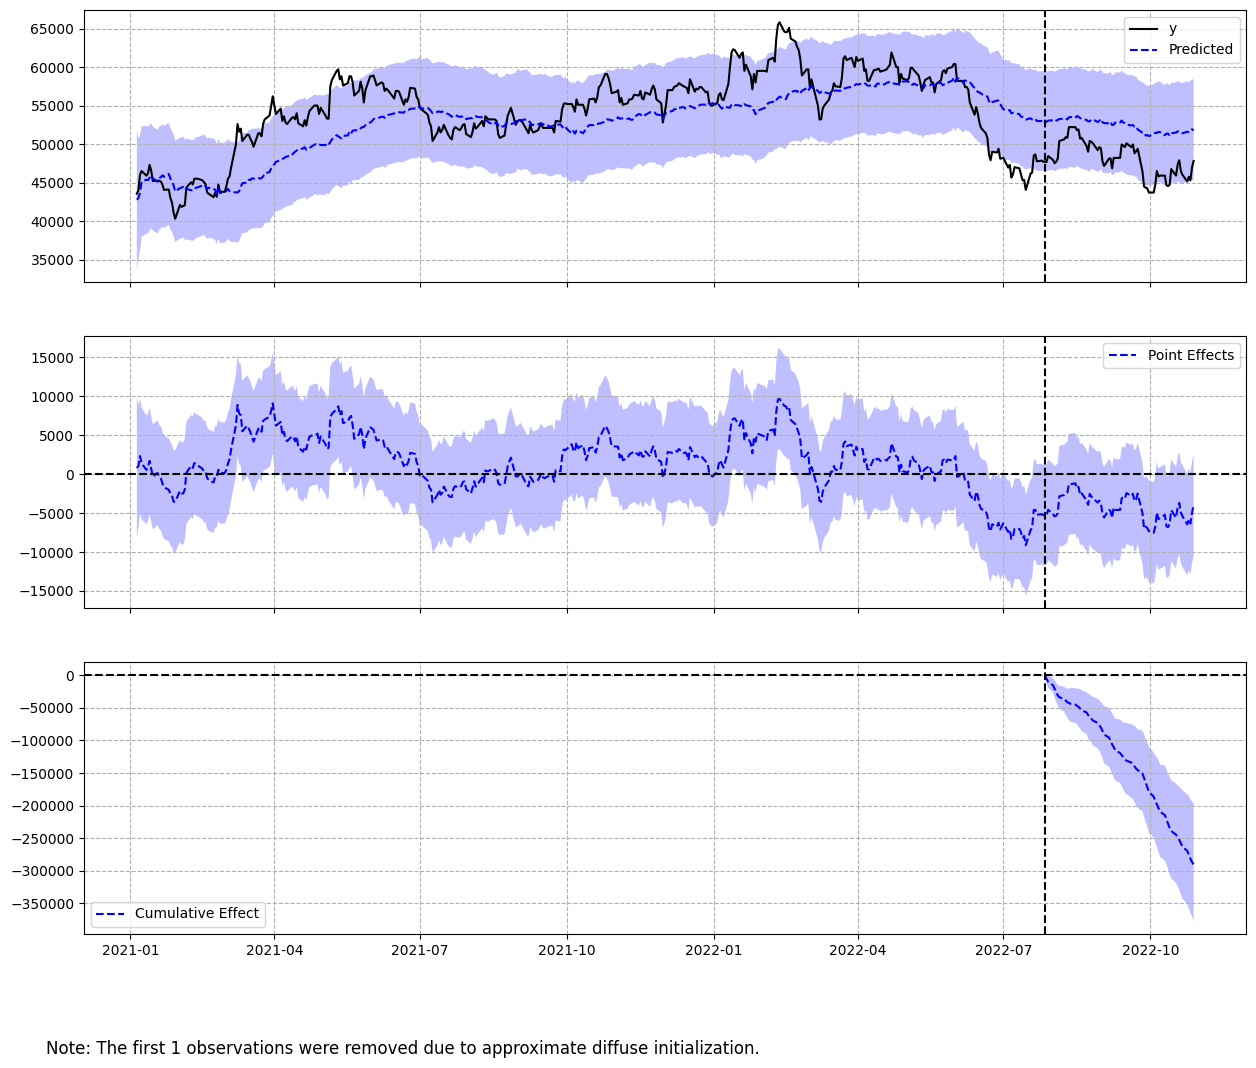

____________________________________________________________________________________________________
우리
Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    11717.16           785050.0
Prediction (s.d.)         12534.91 (169.67)  839839.28 (11367.94)
95% CI                    [12199.5, 12864.6] [817366.52, 861928.04]

Absolute effect (s.d.)    -817.75 (169.67)   -54789.28 (11367.94)
95% CI                    [-1147.43, -482.34][-76878.04, -32316.52]

Relative effect (s.d.)    -6.52% (1.35%)     -6.52% (1.35%)
95% CI                    [-9.15%, -3.85%]   [-9.15%, -3.85%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


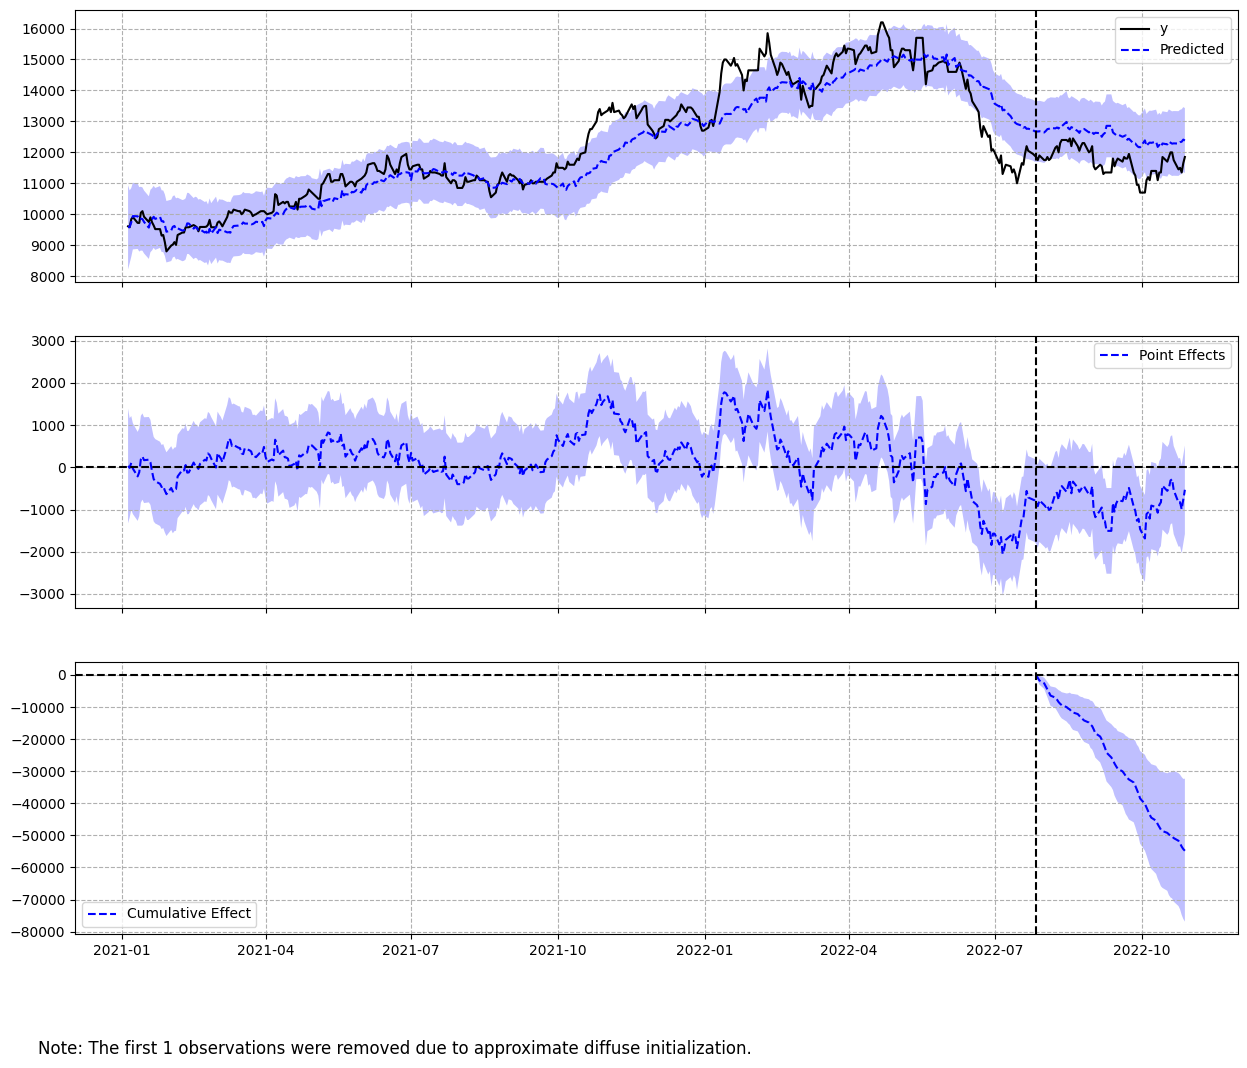

____________________________________________________________________________________________________
하나
Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    38181.34           2558150.0
Prediction (s.d.)         41650.84 (500.2)   2790606.11 (33513.3)
95% CI                    [40680.78, 42641.52][2725612.22, 2856981.94]

Absolute effect (s.d.)    -3469.49 (500.2)   -232456.11 (33513.3)
95% CI                    [-4460.18, -2499.44][-298831.94, -167462.22]

Relative effect (s.d.)    -8.33% (1.2%)      -8.33% (1.2%)
95% CI                    [-10.71%, -6.0%]   [-10.71%, -6.0%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


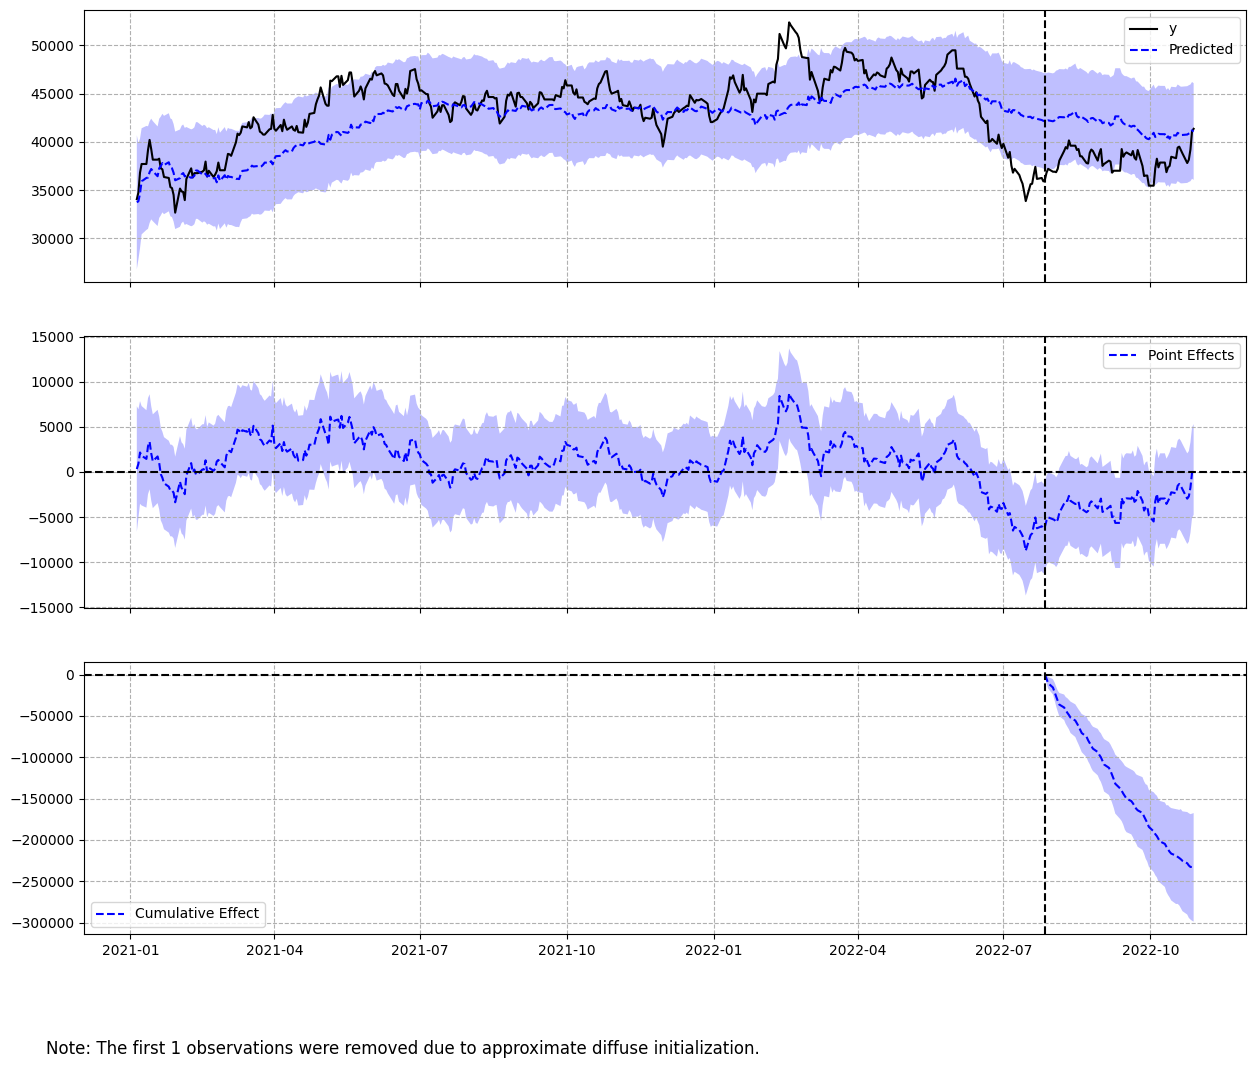

____________________________________________________________________________________________________
신한
Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    35541.04           2381250.0
Prediction (s.d.)         38089.01 (350.44)  2551963.79 (23479.53)
95% CI                    [37396.81, 38770.51][2505586.2, 2597624.28]

Absolute effect (s.d.)    -2547.97 (350.44)  -170713.79 (23479.53)
95% CI                    [-3229.47, -1855.76][-216374.28, -124336.2]

Relative effect (s.d.)    -6.69% (0.92%)     -6.69% (0.92%)
95% CI                    [-8.48%, -4.87%]   [-8.48%, -4.87%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


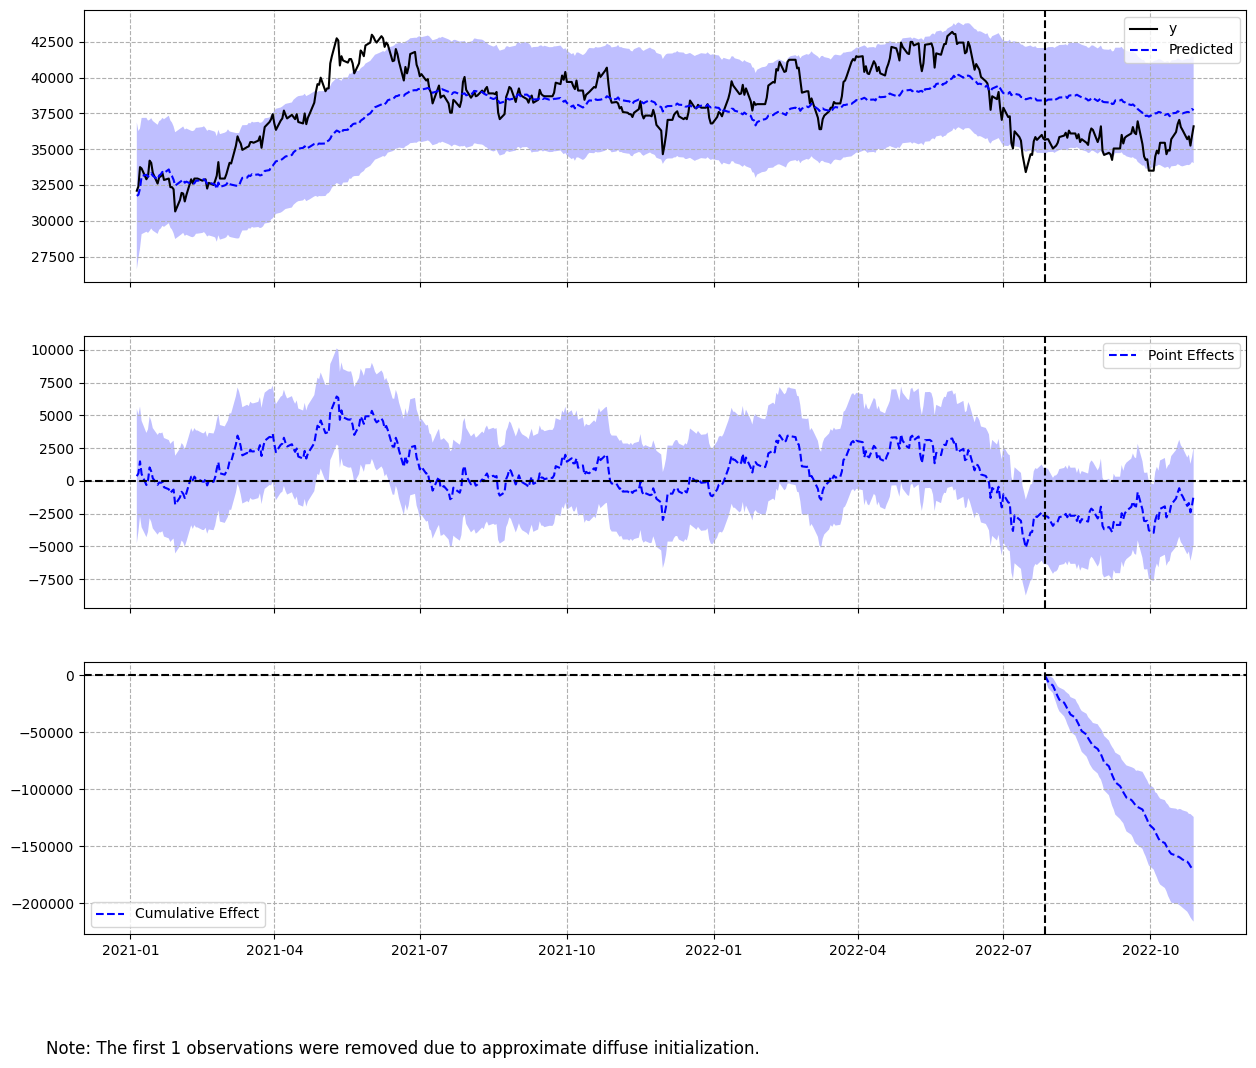

____________________________________________________________________________________________________


In [36]:
for index, row in merged_df.iteritems():
    try:
        if row.sum() > 2:
            ci = pd.DataFrame(row).join(x, how='left')
            ci = ci.join(dfc, how = 'left')
        ci_c = CausalImpact(ci, pre_period, post_period, model_args={'fit_method': 'hmc'}, nseason=[{'period': 12}])
        print(index)
        print(ci_c.summary())
        ci_c.plot()
        print('____________________________________________________________________________________________________')
    except ValueError as e:
        print(e)

In [33]:
'''for index, row in merged_df.iteritems():
    try:
        ci_o = CausalImpact(row, pre_period, post_period, model_args={'fit_method': 'hmc'})
        print(index)
        print(ci_o.summary())
        ci_o.plot()
        print('____________________________________________________________________________________________________')
    except ValueError as e:
        print(e)'''

"for index, row in merged_df.iteritems():\n    try:\n        ci_o = CausalImpact(row, pre_period, post_period, model_args={'fit_method': 'hmc'})\n        print(index)\n        print(ci_o.summary())\n        ci_o.plot()\n        print('____________________________________________________________________________________________________')\n    except ValueError as e:\n        print(e)"